https://projecteuler.net/problem=439

In [24]:
import os

def is_prime(n):
    for div in range(3, int(n**0.5)+1, 2):
        if n%div == 0:
            return 0
    return 1

def predata(limit): # fill is_prime(n) for every n in range(3,limit+1,2)
    with open("439.txt", "w") as file:
        for n in range(3,limit+1,2):
            file.write(str(is_prime(n)))

In [23]:
predata(316223)

In [28]:
class p439_v1():
    def __init__(self):
        pass
    
    def get_sum_div(self, n):
        res = 0
        for i in range(1, n+1):
            if n % i == 0:
                res += i
        return res
    
    def get_solution(self, n):
        total = 0
        for i in range(1, n+1):
            for j in range(1, n+1):
                res = self.get_sum_div(i*j)
                total += res
        return total

In [29]:
class p439_v2():
    def __init__(self):
        pass
    
    def get_sum_div(self, n):
        res = 0
        for i in range(1, int(n**0.5)+1):
            if n % i == 0:
                if i == n // i:
                    res += i
                else:
                    res += i + n // i
        return res
    
    def get_solution(self, n):
        total = 1
        for i in range(2, n+1):
            res = self.get_sum_div(i**2)
            total += res
        for i in range(1, n+1):
            for j in range(i+1, n+1):
                res = self.get_sum_div(i*j)
                total += res * 2
        return total

In [30]:
class p439_v3():
    def __init__(self):
        self.prime_list = [2]
        with open("439.txt", "r") as f:
            for n, i in enumerate(f.read()):
                if i == "1":
                    self.prime_list.append(n*2+3)
    
    def prime_factor(self, n):
        prime_factor_list = []
        prime_factor_amount = []
        for prime in self.prime_list:
            if prime > n**0.5:
                if n > 1:
                    prime_factor_list.append(n)
                    prime_factor_amount.append(1)
                break
            if n % prime == 0:
                prime_factor_list.append(prime)
                prime_factor_amount.append(0)
                while n % prime == 0:
                    prime_factor_amount[-1] += 1
                    n = n // prime
        return prime_factor_list, prime_factor_amount
    
    def get_sum_div(self, n):
        prime_factor_list, prime_factor_amount = self.prime_factor(n)
        res = 0
        total_div = 1
        length = len(prime_factor_amount)
        for amount in prime_factor_amount:
            total_div *= amount+1
        
        table_count = [0] * length
        cursor = 0
        div = 1
        current_div = 1
        while current_div < total_div:
            res += div + n // div
            table_count[cursor] += 1
            if table_count[cursor] > prime_factor_amount[cursor]:
                while table_count[cursor] > prime_factor_amount[cursor]:
                    table_count[cursor] = 0
                    div = div // (prime_factor_list[cursor] ** prime_factor_amount[cursor])
                    cursor += 1
                    table_count[cursor] += 1
                div *= prime_factor_list[cursor]
                cursor = 0
            else:
                div *= prime_factor_list[cursor]
            current_div += 2
        if total_div % 2 == 1:
            res += div
        return res
    
    def get_solution(self, n):
        total = 1
        for i in range(2, n+1):
            res = self.get_sum_div(i**2)
            total += res
        for i in range(1, n+1):
            for j in range(i+1, n+1):
                res = self.get_sum_div(i*j)
                total += res * 2
        return total

In [32]:
import time

v1 = p439_v1()
v2 = p439_v2()
v3 = p439_v3()
for i in range(1, 500):
    time_list = []
    res = []
    for v, algo in enumerate([v2, v3]):
        start = time.time()
        res.append(algo.get_solution(i))
        time_list.append(time.time() - start)
    if len(set(res)) != 1:
        print("Error in sol", res)
        input()
    else:
        print(i, time_list)

1 [8.106231689453125e-06, 3.814697265625e-06]
2 [3.075599670410156e-05, 3.123283386230469e-05]
3 [2.4080276489257812e-05, 3.7670135498046875e-05]
4 [3.170967102050781e-05, 6.175041198730469e-05]
5 [4.696846008300781e-05, 9.489059448242188e-05]
6 [6.4849853515625e-05, 0.00014925003051757812]
7 [8.606910705566406e-05, 0.00020241737365722656]
8 [0.00011730194091796875, 0.00026535987854003906]
9 [0.00014281272888183594, 0.0003516674041748047]
10 [0.00017762184143066406, 0.00045680999755859375]
11 [0.0002148151397705078, 0.0005245208740234375]
12 [0.0002529621124267578, 0.0006420612335205078]
13 [0.00030040740966796875, 0.0007617473602294922]
14 [0.0003707408905029297, 0.0009829998016357422]
15 [0.0004405975341796875, 0.001153707504272461]
16 [0.0005023479461669922, 0.0013110637664794922]
17 [0.0005743503570556641, 0.0014851093292236328]
18 [0.0006268024444580078, 0.0016391277313232422]
19 [0.0006959438323974609, 0.0018143653869628906]
20 [0.000804901123046875, 0.0022056102752685547]
21 [0.

KeyboardInterrupt: 

In [43]:
import matplotlib.pyplot as plt
import math
import time

def draw_single(x_start, x_end, y_end, x_val, y, colors):
    plt.axis([x_start, x_end, 0, y_end])
    for y_val, color in zip(y, colors):
        plt.scatter(x_val[:len(y_val)], y_val, color=color, s=1)
    plt.draw()
    plt.show()

def make_plot(x_start, x_end, timelimit, function_list, val_amount=1000, step_mult=1, ko_time_average=1, ko_limit=1, 
              path_to_save=None, colors=["red", "green", "blue", "orange", "grey", "purple", "black", "pink"]):
    distance = x_end - x_start
    step = distance / val_amount
    
    for func in function_list:
        x_val = []
        y_val = []
        time_got = 0
        time_average = [0] * ko_time_average
        ko_amount = 0
        query = x_start
        realquery = query
        cpt = 0
        
        while query <= x_end and sum(time_average)/ko_time_average < timelimit and ko_amount < ko_limit:
            time_start = time.time()
            func(realquery)
            time_got = time.time()
            x_val.append(query)
            y_val.append(time_got)
            
            if time_got > timelimit and time_average[cpt%ko_time_average] < timelimit:
                ko_amount += 1
            if time_got < timelimit and time_average[cpt%ko_time_average] > timelimit:
                ko_amount -= 1
            time_average[cpt%ko_time_average] = time_got
            
            if step_mult == 1:
                query += step
            else:
                query *= step_mult
            realquery = int(query)
            cpt += 1
        draw_single(x_start, x_end, timelimit, x_val, y_val, colors)

TypeError: object of type 'float' has no len()

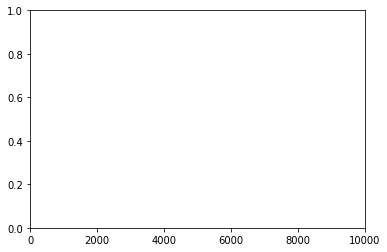

In [44]:
v1 = p439_v1().get_solution
v2 = p439_v2().get_solution
v3 = p439_v3().get_solution
make_plot(1, 10000, 1, [v1,v2,v3])